# Introduction to dataset
* The Iris dataset contains the data for 50 flowers from each of the 3 species Setosa, Versicolor and Virginica.
* The data gives the measurements in centimeters of the following variables for each of the flowers:<br>
>Sepal length and width<br>
>Petal length and width<br>
* The task it poses of discriminating between three species of Iris from measurements of their petals and sepals is simple but challenging.

**Attribute Information**
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

**Different classes in this dataset**
* Iris Setosa
* Iris Versicolour
* Iris Virginica

**Importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**LOADING DATASET**

In [2]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('../input/iris/Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# number of rows and columns in the dataset
df.shape

(150, 6)

In [5]:
#deleting 'Id' as it is of no use 
df = df.drop('Id', axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Exploratory Data Analysis

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# to display no. of samples on each class
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#checking for missing data
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Univariate Analysis**

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

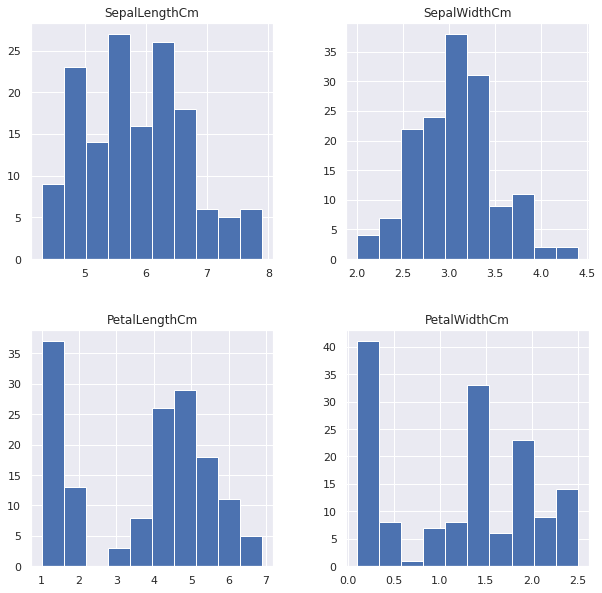

In [9]:
#Histograms for all the features
df.hist(figsize = (10,10))

**Bivariate Analysis**

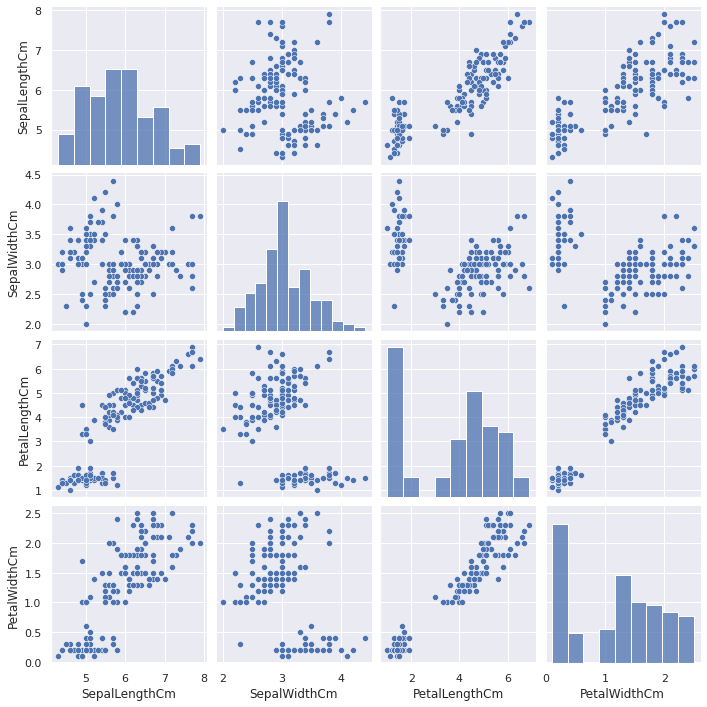

In [10]:
sns.pairplot(df)

**Scatterplots**

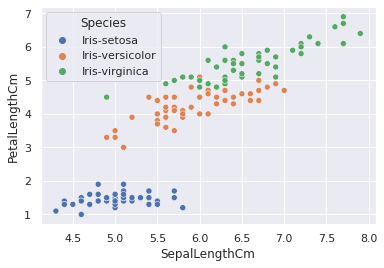

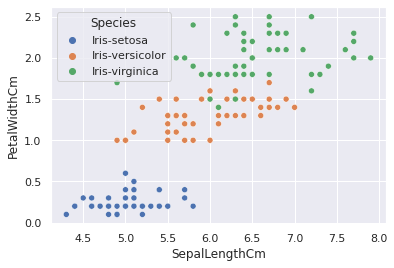

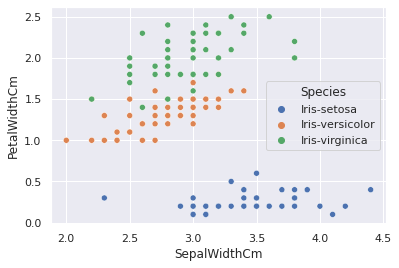

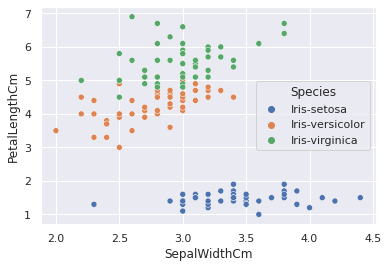

In [11]:
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species', data = df  ) 
plt.show()
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df  )
plt.show()
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalWidthCm', hue = 'Species', data = df  )
plt.show()
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalLengthCm', hue = 'Species', data = df  )
plt.show()

**Violin plot**

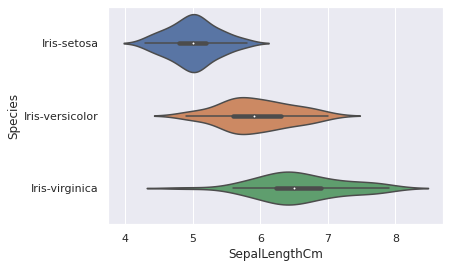

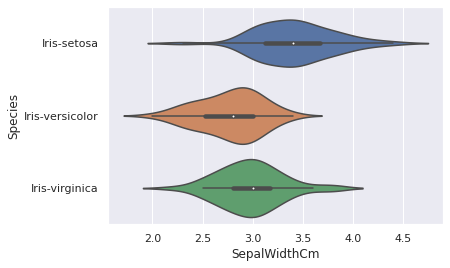

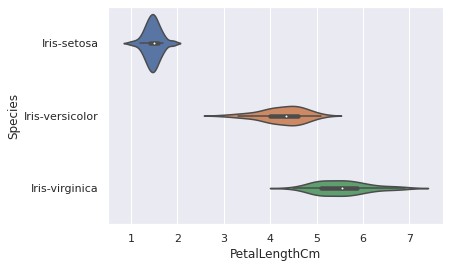

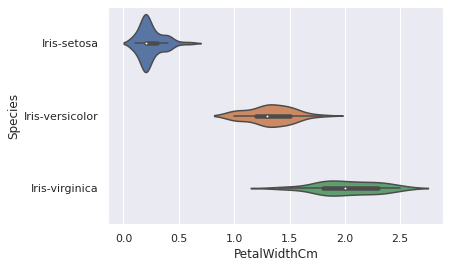

In [12]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='box')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='box')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='box')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='box')
plt.show()

# Label Encoding


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Species = le.fit_transform(df.Species)

In [14]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# K means clustering

**Selecting number of clusters using Elbow Method**

In [15]:
#WCSS (within cluster sum of squares
wcss = []

x = df.iloc[:,[0,1,2,3]].values
for i in range(1,6):
    kmeans = KMeans(i, random_state = 0, max_iter = 250)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within Cluster sum of squares')

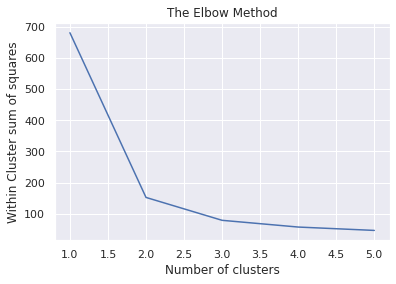

In [16]:
number_of_clusters = range(1,6)
plt.plot(number_of_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of squares')

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,random_state = 0)

preds_kmeans = kmeans.fit_predict(x)
preds_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

**Visualizing clusters**

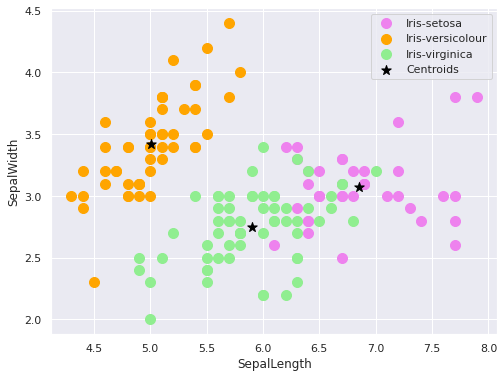

In [19]:
plt.figure(figsize = (8,6))
plt.scatter(x[preds_kmeans == 0, 0], x[preds_kmeans == 0, 1], s = 100, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[preds_kmeans == 1, 0], x[preds_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[preds_kmeans == 2, 0], x[preds_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Iris-virginica')
plt.ylabel('SepalWidth')
plt.xlabel('SepalLength')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = '*')
plt.legend()

# Predictions using Decision Tree

In [20]:
X = df.drop('Species', axis = 1)
y = df.Species

#splitting data into train and test subset
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 50)

In [21]:
model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Visualizing the decision tree**

In [22]:
decision_tree = tree.export_graphviz(model,out_file='tree.dot',feature_names=X.columns,max_depth=6,filled=True)
!dot -Tpng tree.dot -o tree.png

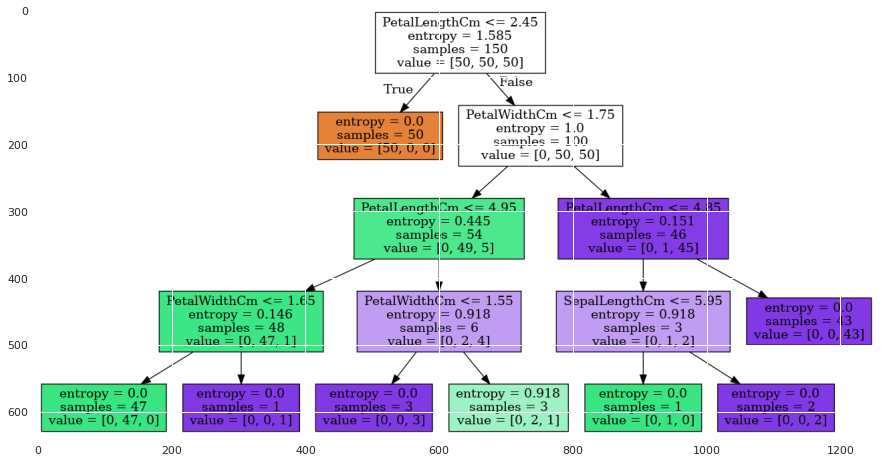

In [23]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

**Model Evaluation**

In [24]:

train_accuracy = accuracy_score(model.predict(X_train), y_train)

print('training accuracy score :', train_accuracy)

training accuracy score : 0.9904761904761905


In [25]:
test_accuracy = accuracy_score(model.predict(X_test), y_test)

print('test accuracy score :', train_accuracy)


test accuracy score : 0.9904761904761905
